# Codes for data visualization

In [249]:
import sqlite3 as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
dw_df = pd.read_csv('dw_df.csv')

In [251]:
dw_df['creationDate'] = pd.to_datetime(dw_df['creationDate']).dt.date

In [252]:
studyID3_df = dw_df.loc[((dw_df.studyID_id==3) & (dw_df.factorID != 26))]
studyID3_df.isnull().any()

Unnamed: 0           False
questionID_id        False
response             False
questionID           False
questionTextID_id    False
surveyID_id          False
questionTextID       False
factorID_id          False
positive_p           False
factorID             False
factorName           False
studyID_id           False
surveyID             False
userID_id            False
creationDate         False
completionDate       False
dtype: bool

In [253]:
studyID3_df.head()

,Unnamed: 0,questionID_id,response,questionID,questionTextID_id,surveyID_id,questionTextID,factorID_id,positive_p,factorID,factorName,studyID_id,surveyID,userID_id,creationDate,completionDate
4572,4577,4006,5,4006,37,987,37,11,1,11,Compensation and Benefits,3,987,2,2021-04-20,2021-04-20 15:08:12.015196
4573,4578,4007,3,4007,43,987,43,12,1,12,Relationship with Co-Workers,3,987,2,2021-04-20,2021-04-20 15:08:12.015196
4574,4579,4008,4,4008,49,987,49,13,1,13,General Satisfaction,3,987,2,2021-04-20,2021-04-20 15:08:12.015196
4575,4580,4009,2,4009,54,987,54,14,1,14,Relationship with Supervisor,3,987,2,2021-04-20,2021-04-20 15:08:12.015196
4576,4581,4010,4,4010,56,987,56,15,1,15,Company Administration,3,987,2,2021-04-20,2021-04-20 15:08:12.015196


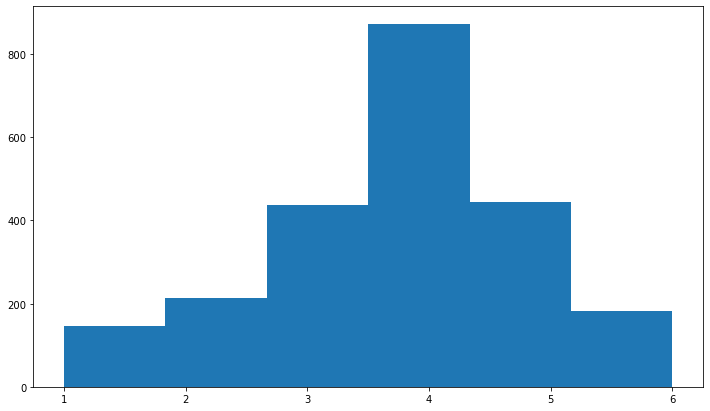

In [254]:
plt.hist(studyID3_df.response,bins=6)
# plt.xlabel('Facots')
# plt.ylabel('Response')

fig = plt.gcf()
fig.set_size_inches(12,7)

In [255]:
studyID3_df = studyID3_df.groupby(by=['factorID_id','creationDate'],as_index=False).mean()
studyID3_df.shape
df_by_factor = studyID3_df[studyID3_df['factorID_id']==11]

In [303]:
factorID_ids = studyID3_df.factorID_id.unique()

## Methods for ploting figures for each factor
def plot_response(factorID_ids):
    i = 0
    for factorID_id in factorID_ids:
        ## this is used to get the figure number from sub plot
        i+=1
        
        ## This codes retrieves factor name by factor ID
        factorName = (list(dw_df.loc[dw_df['factorID_id']==factorID_id,'factorName'])[0])
        
        ## made data frame for individula factor
        df_by_factor = studyID3_df[studyID3_df['factorID_id']==factorID_id]
        
        ## Codes for ploting
        
        row = len(factorID_ids)
        ax = plt.subplot(row,1,i)
        
        err = df_by_factor.std().response
        plt.errorbar(df_by_factor.creationDate,df_by_factor.response,yerr=err)
        
        fig = plt.gcf()
        fig.set_size_inches(16,40)
        
        plt.grid(True)
        plt.xlabel('Date',fontsize=1)
        plt.ylabel('Mean Response',fontsize=13)
        plt.title(factorName,fontsize=20)
        
        # Adjusting tick sizes
        ax.tick_params(axis='both', which='major', labelsize=13)
        plt.show()

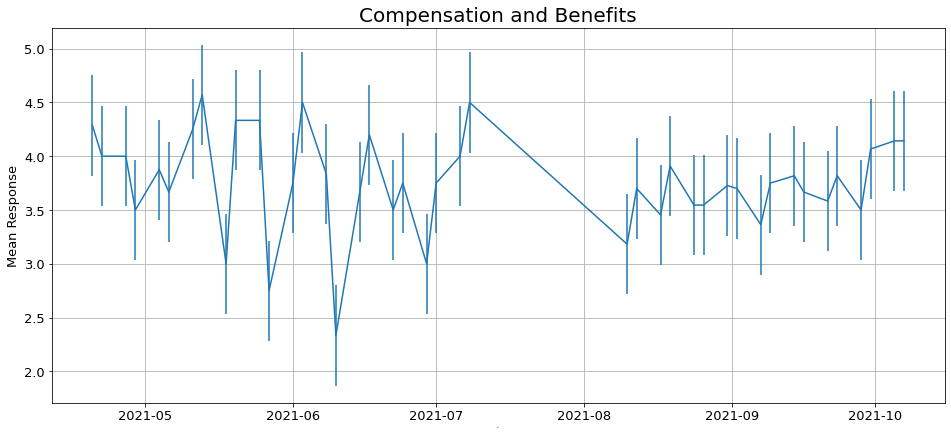

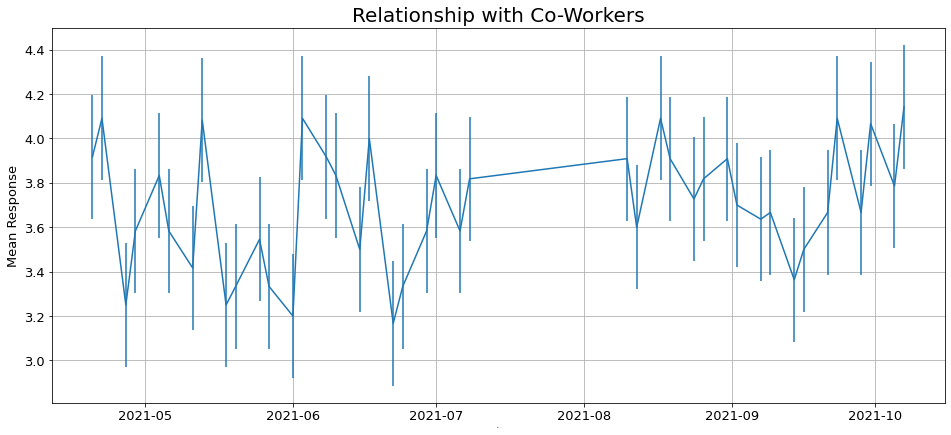

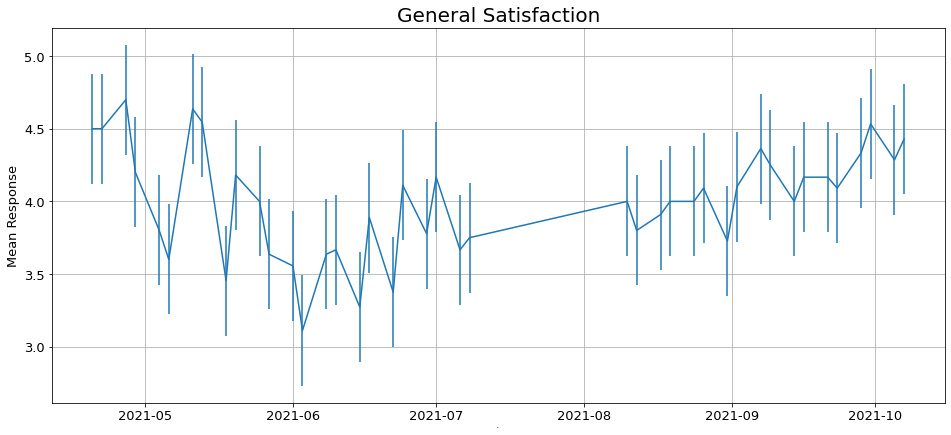

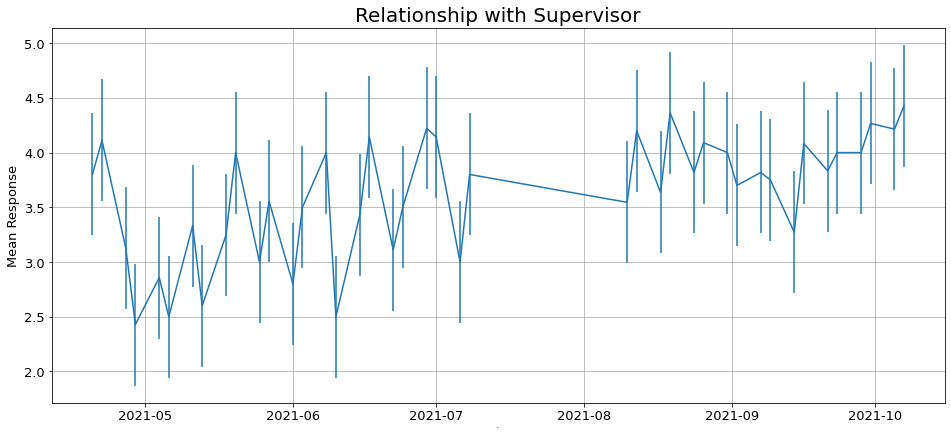

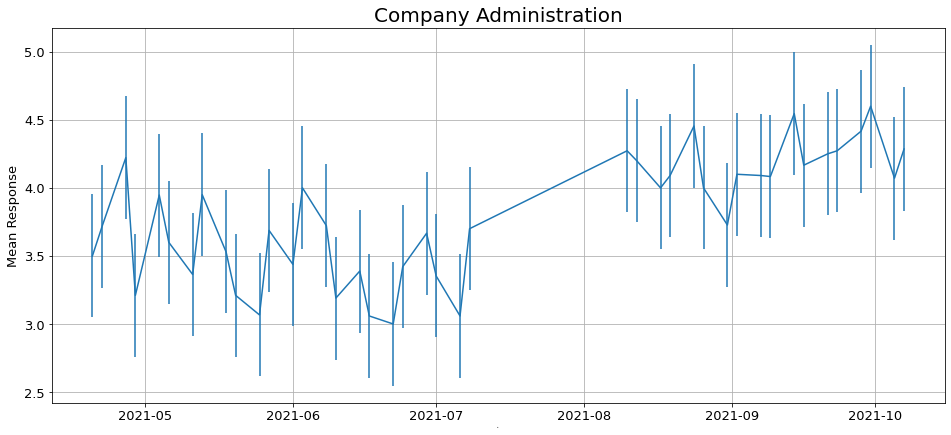

In [304]:
plot_response(factorID_ids)